In [8]:
from shapely.geometry import LineString
import shapely
import geopandas as gpd

In [9]:
local_crs = 3414

place= "singapore"

In [10]:

# define the file path
file_path = f"./out/{place}/streets_raw.shp"

# read the shapefile using geopandas
streets = gpd.read_file(file_path)


In [11]:
# Assuming your GeoDataFrame is named 'gdf'
line_strings = []
for geometry in streets.geometry:
    if geometry.geom_type == 'LineString':
        line_strings.append(geometry)
    elif geometry.geom_type == 'MultiLineString':
        line_strings.extend(list(geometry))

In [12]:
collection = shapely.GeometryCollection(line_strings)  # combine to a single object
noded = shapely.node(collection)  # add missing nodes
streets_noded_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(noded), crs=local_crs)

<Axes: >

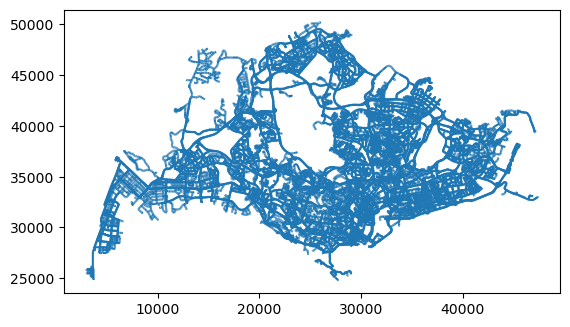

In [13]:
streets_noded_gdf.plot()

In [14]:
streets_noded_gdf.to_parquet(f"./out/{place}/streets.pq")